# Import Lbrary & Model

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.multioutput import MultiOutputClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import joblib

# Data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train_file = pd.read_csv('/content/drive/MyDrive/Telkom/Latihan Satria Data/train.csv')
test_file = pd.read_csv('/content/drive/MyDrive/Telkom/Latihan Satria Data/test.csv')

In [ ]:
train_file

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


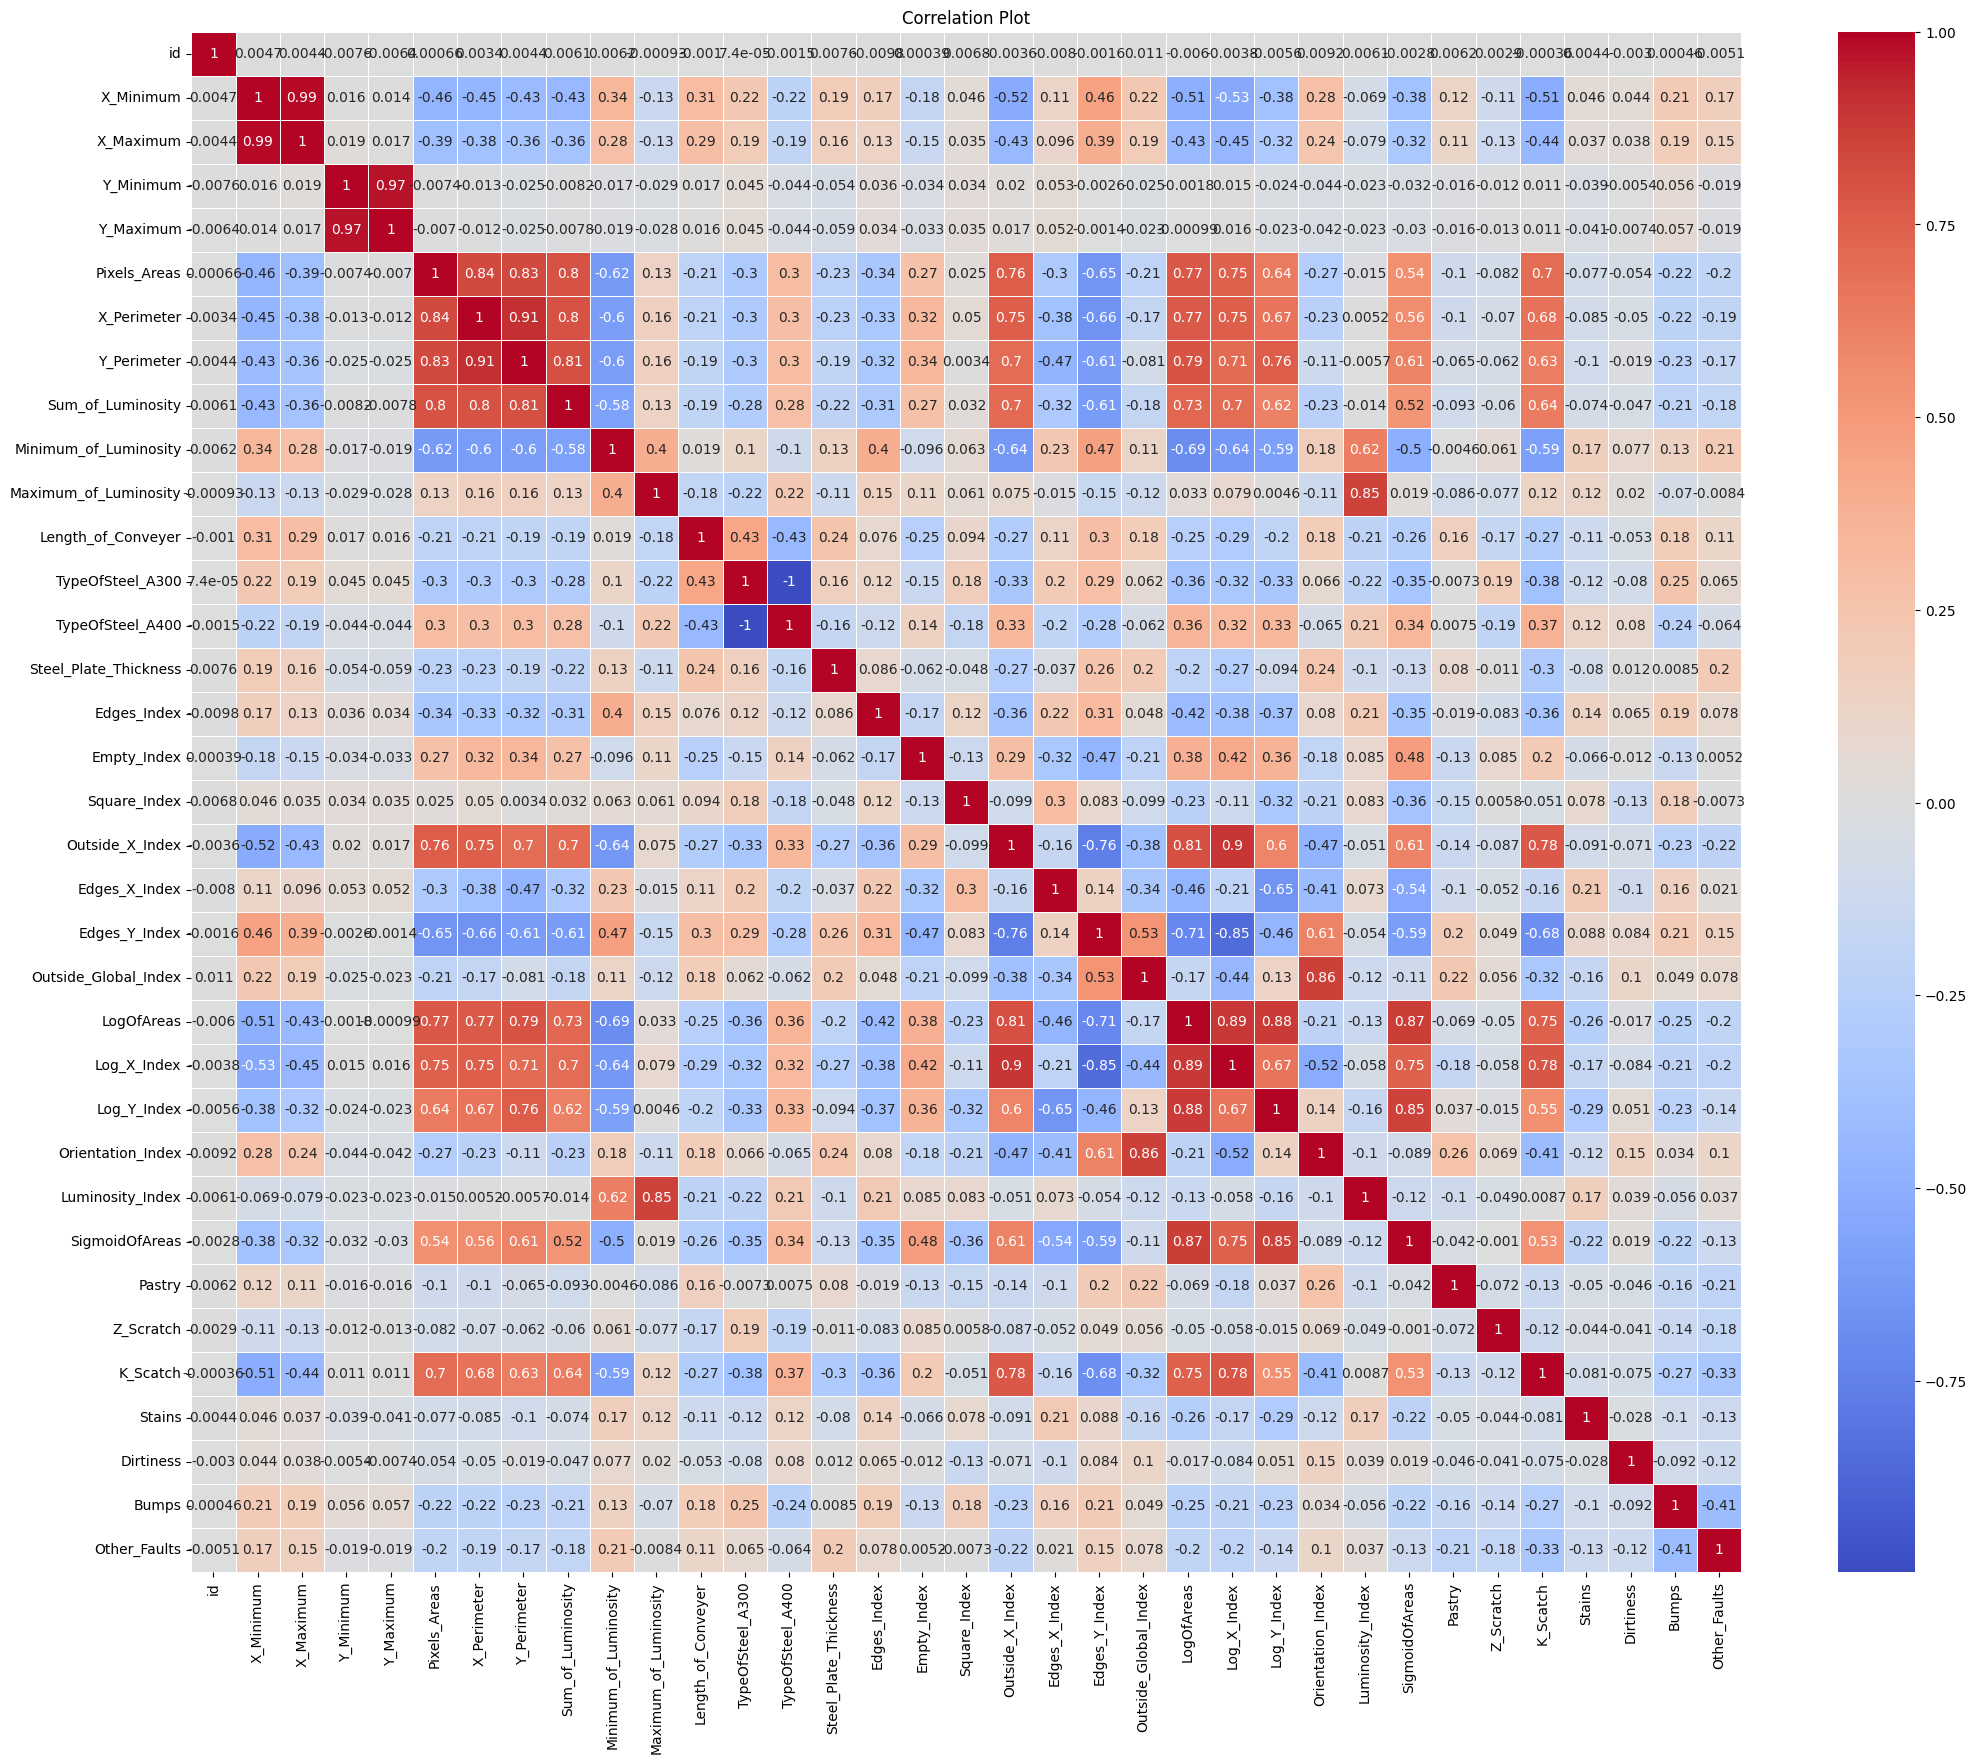

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = train_file.corr()

# Membuat plot korelasi menggunakan heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot')
plt.show()

In [ ]:
#'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'

In [ ]:
x_train = train_file.drop(['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis = 1)
y_train = train_file[['Pastry']]
y_train1 = train_file[['Z_Scratch']]
y_train2 = train_file[['K_Scatch']]
y_train3 = train_file[['Stains']]
y_train4 = train_file[['Dirtiness']]
y_train5 = train_file[['Bumps']]
y_train6 = train_file[['Other_Faults']]

In [ ]:
y_train = train_file[['Pastry','Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
test_id = test_file['id']
test_featureColumns = test_file.drop(['id'], axis = 1)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)
X_test_scaled = scaler.transform(test_featureColumns)

In [ ]:
models = {}
# DataFrame to store test predictions
submission = pd.DataFrame()
submission['id'] = test_id


In [ ]:
for column in y_train.columns:
  # Define hyperparameter grid
  param_grid = {
     'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}


  # Create the model (replace with LGBMClassifier if desired)
  model = XGBClassifier()

  # Perform tuning using RandomizedSearchCV
  tuner = RandomizedSearchCV(model, param_grid, n_iter=20, cv=5, scoring='roc_auc')
  best_model = tuner.fit(X_train, Y_train[column])
  best_params = best_model.best_params_
  best_model = tuner.best_estimator_

  # Store the tuned model
  models[column] = best_model
  submission[column] = best_model.predict_proba(test_featureColumns)[:, 1]

submission.to_csv('submission.csv', index=False)

In [ ]:
# Dictionary to store models for each label for possible later use
models = {}
# DataFrame to store test predictions
submission = pd.DataFrame()
submission['id'] = test_id